In [ ]:
# --------------------------
# 1. DATA LOADING & INSPECTION
# --------------------------



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/BIS/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# =====================
# 2. DATA EXPLORATION
# =====================
# Basic statistics showing potential missing values (zeros)

In [4]:
print("Initial Statistics:")
print(data.describe())

Initial Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

In [5]:
# Dataset structure information
print("\nData Structure:")
data.info()


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Check data dimensions
print(f"\nDataset Shape: {data.shape}")


Dataset Shape: (768, 9)


In [7]:
# Value distribution check
print("\nValue Counts Analysis:")
print(data.value_counts())


Value Counts Analysis:
Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     

In [8]:
# Column names verification
print("\nColumns:", data.columns.tolist())



Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [9]:
# Missing values check (explicit nulls)
print("\nExplicit Missing Values:")
print(data.isnull().sum())



Explicit Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Check duplicates
print("\nDuplicate Check:")
print(data[data.duplicated()])


Duplicate Check:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [11]:
# =====================
# 3. DATA CLEANING
# =====================
# Handle biological zeros (implicit missing values)
# Median imputation for normally distributed features

In [12]:
median_cols = ['Glucose', 'BloodPressure', 'BMI']
data[median_cols] = data[median_cols].replace(0, np.nan).fillna(data[median_cols].median())

In [13]:
# KNN imputation for skewed features
from sklearn.impute import KNNImputer
knn_cols = ['SkinThickness', 'Insulin']
knn_imputer = KNNImputer(n_neighbors=5)
data[knn_cols] = knn_imputer.fit_transform(data[knn_cols])

In [14]:
# Outlier removal using IQR method
def detect_outliers_iqr(data):
    outliers = []
    for col in data.select_dtypes(include=np.number):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers.extend(data[(data[col] < Q1-1.5*IQR) | (data[col] > Q3+1.5*IQR)].index)
    return data.drop(list(set(outliers)))

data = detect_outliers_iqr(data)
print(f"\nPost-cleaning shape: {data.shape}")


Post-cleaning shape: (675, 9)


In [ ]:
# =====================
# 4. EXPLORATORY DATA ANALYSIS
# =====================
# Outcome distribution analysis

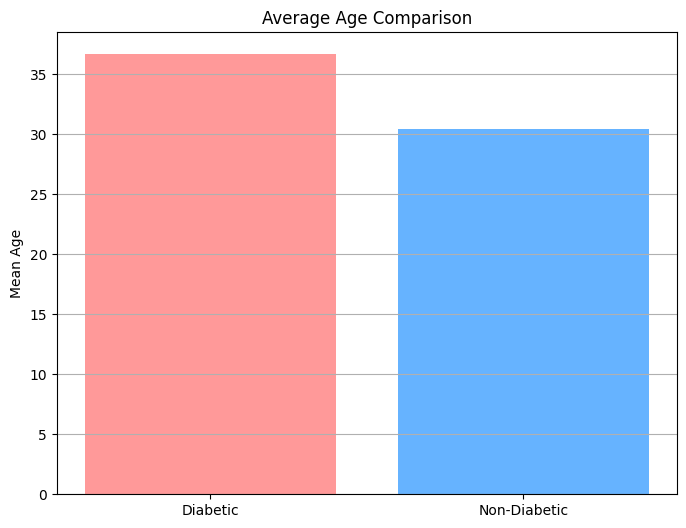

In [16]:
# Age comparison analysis
diabetic = data[data['Outcome']==1]
non_diabetic = data[data['Outcome']==0]

plt.figure(figsize=(8,6))
plt.bar(["Diabetic", "Non-Diabetic"],
        [diabetic['Age'].mean(), non_diabetic['Age'].mean()],
        color=['#ff9999', '#66b3ff'])
plt.title("Average Age Comparison")
plt.ylabel("Mean Age")
plt.grid(axis='y')
plt.show()

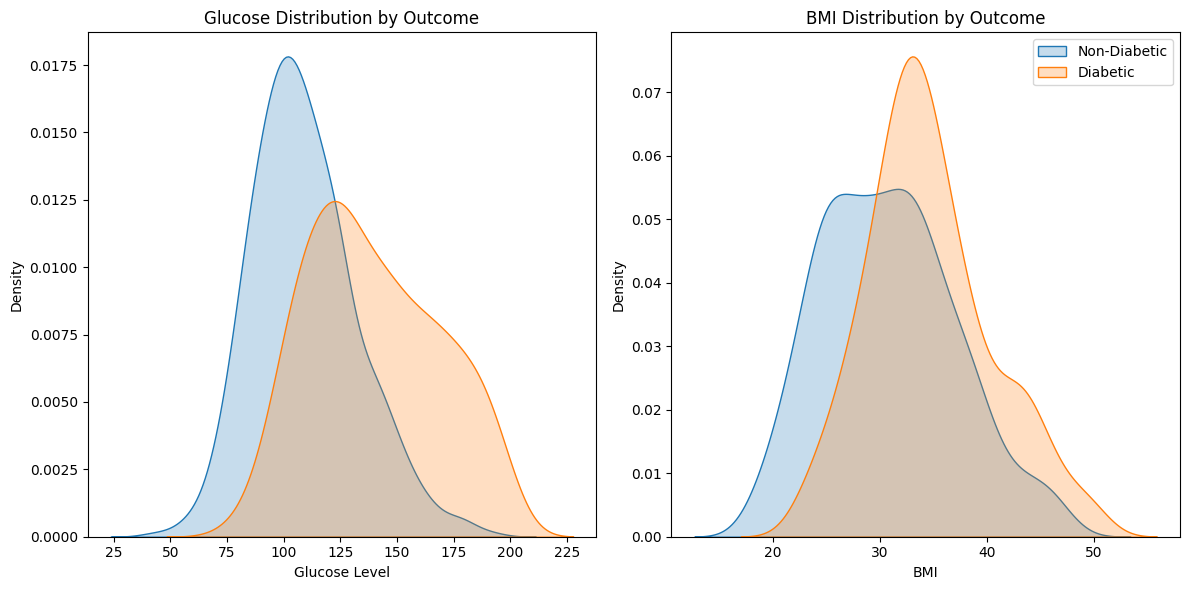

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Density plots for Glucose and BMI
plt.figure(figsize=(12, 6))

# Glucose
plt.subplot(1, 2, 1)
sns.kdeplot(data[data['Outcome'] == 0]['Glucose'], label='Non-Diabetic', fill=True)
sns.kdeplot(data[data['Outcome'] == 1]['Glucose'], label='Diabetic', fill=True)
plt.title('Glucose Distribution by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Density')

# BMI
plt.subplot(1, 2, 2)
sns.kdeplot(data[data['Outcome'] == 0]['BMI'], label='Non-Diabetic', fill=True)
sns.kdeplot(data[data['Outcome'] == 1]['BMI'], label='Diabetic', fill=True)
plt.title('BMI Distribution by Outcome')
plt.xlabel('BMI')
plt.ylabel('Density')

plt.legend()
plt.tight_layout()
plt.show()


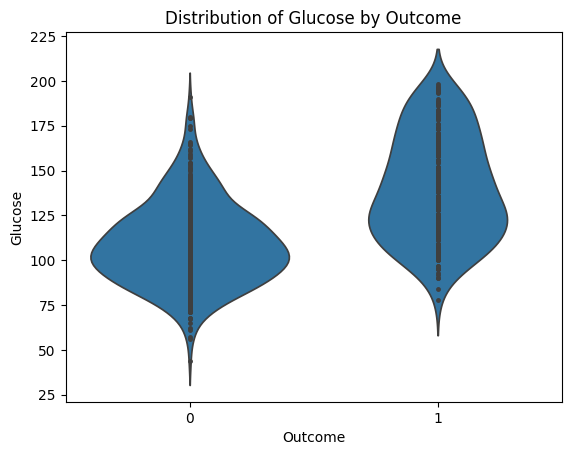

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot of Glucose distribution based on Outcome
sns.violinplot(x="Outcome", y="Glucose", data=data, inner="point")  # or inner="stick"

plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title("Distribution of Glucose by Outcome")

plt.show()

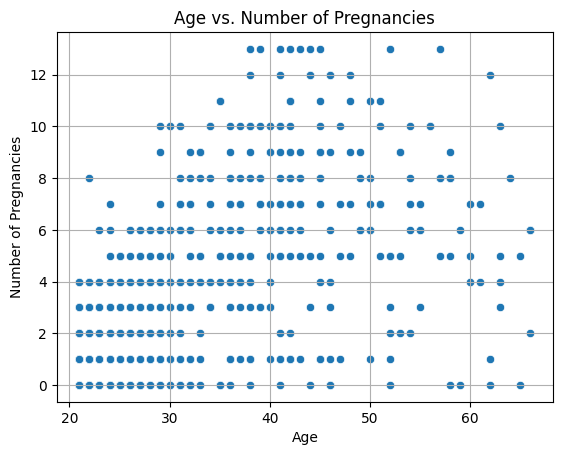

In [39]:
# This chart represent the correlation between age and number of pregnancies
sns.scatterplot(x="Age", y="Pregnancies", data=data)
plt.xlabel("Age")
plt.ylabel("Number of Pregnancies")
plt.title("Age vs. Number of Pregnancies")
plt.grid(True)
plt.show()

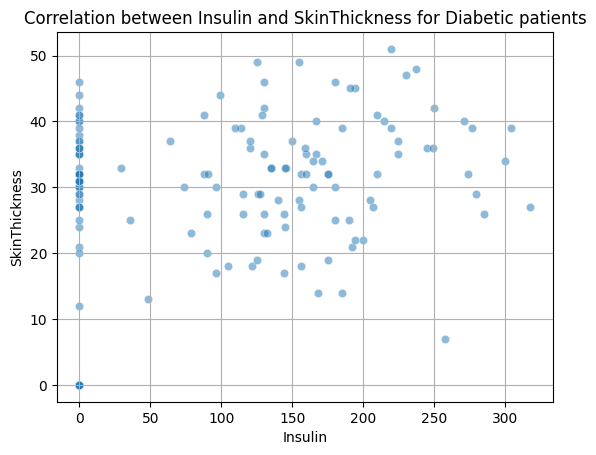

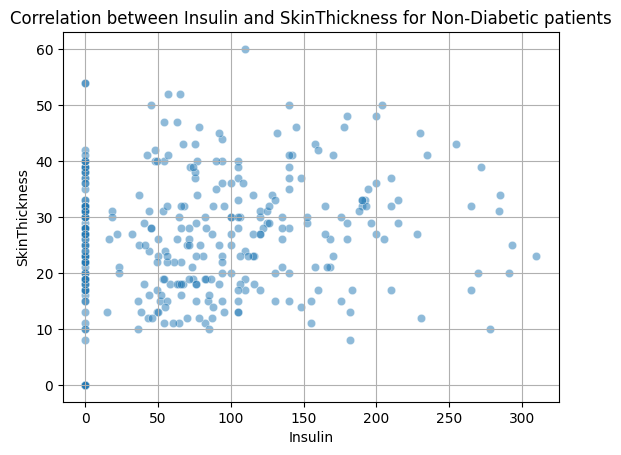

In [40]:
# Filter for diabetic and non-diabetic groups
diabetic = data[data["Outcome"] == 1]
non_diabetic = data[data["Outcome"] == 0]

# Scatterplot for diabetic patients
sns.scatterplot(x="Insulin", y="SkinThickness", data=diabetic, alpha=0.5)
plt.xlabel("Insulin")
plt.ylabel("SkinThickness")
plt.title("Correlation between Insulin and SkinThickness for Diabetic patients")
plt.grid(True)
plt.show()

# Scatterplot for non-diabetic patients
sns.scatterplot(x="Insulin", y="SkinThickness", data=non_diabetic, alpha=0.5)
plt.xlabel("Insulin")
plt.ylabel("SkinThickness")
plt.title("Correlation between Insulin and SkinThickness for Non-Diabetic patients")
plt.grid(True)
plt.show()

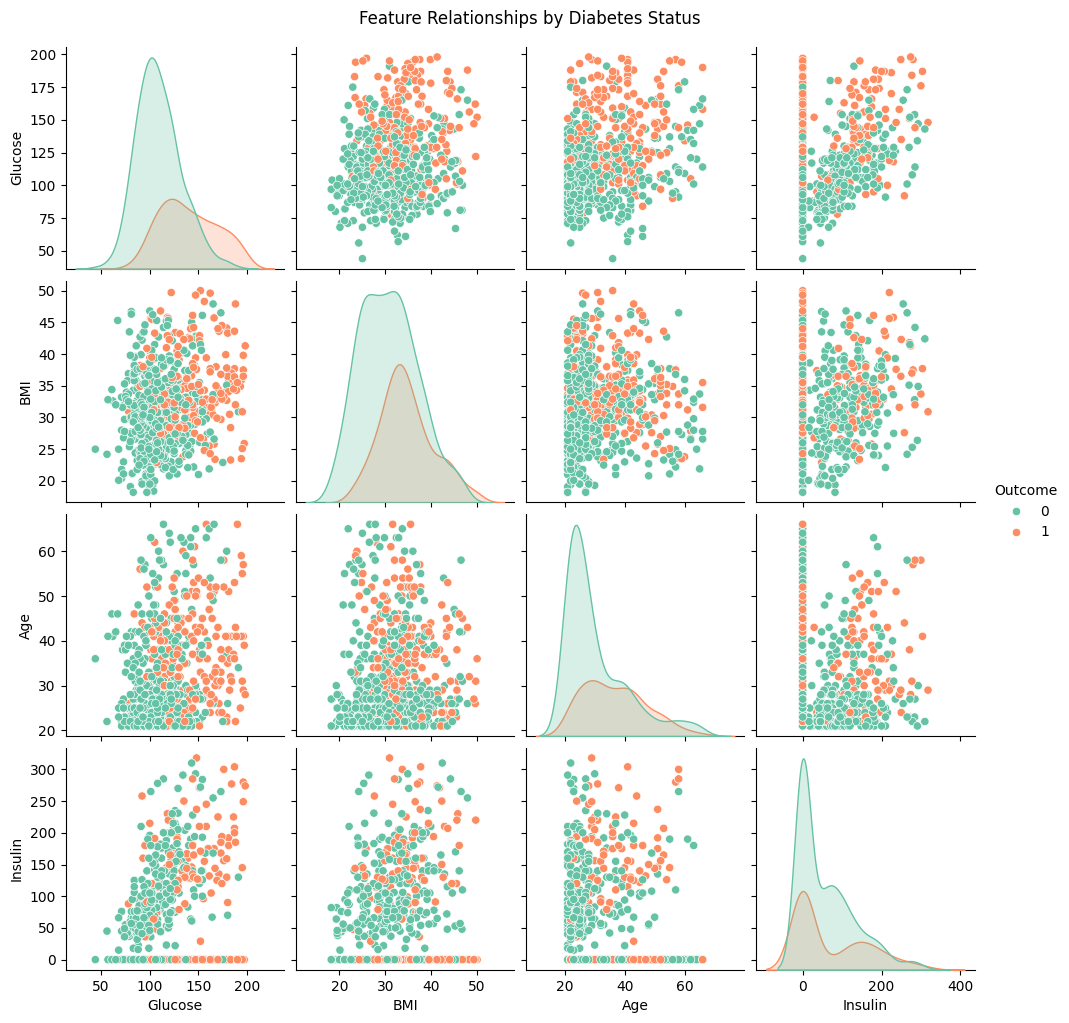

In [27]:
# Scatterplot matrix for key relationships
sns.pairplot(data, vars=['Glucose', 'BMI', 'Age', 'Insulin'],
             hue='Outcome', palette='Set2')
plt.suptitle("Feature Relationships by Diabetes Status", y=1.02)
plt.show()

In [17]:
# =====================
# 5. VISUALIZATIONS
# =====================

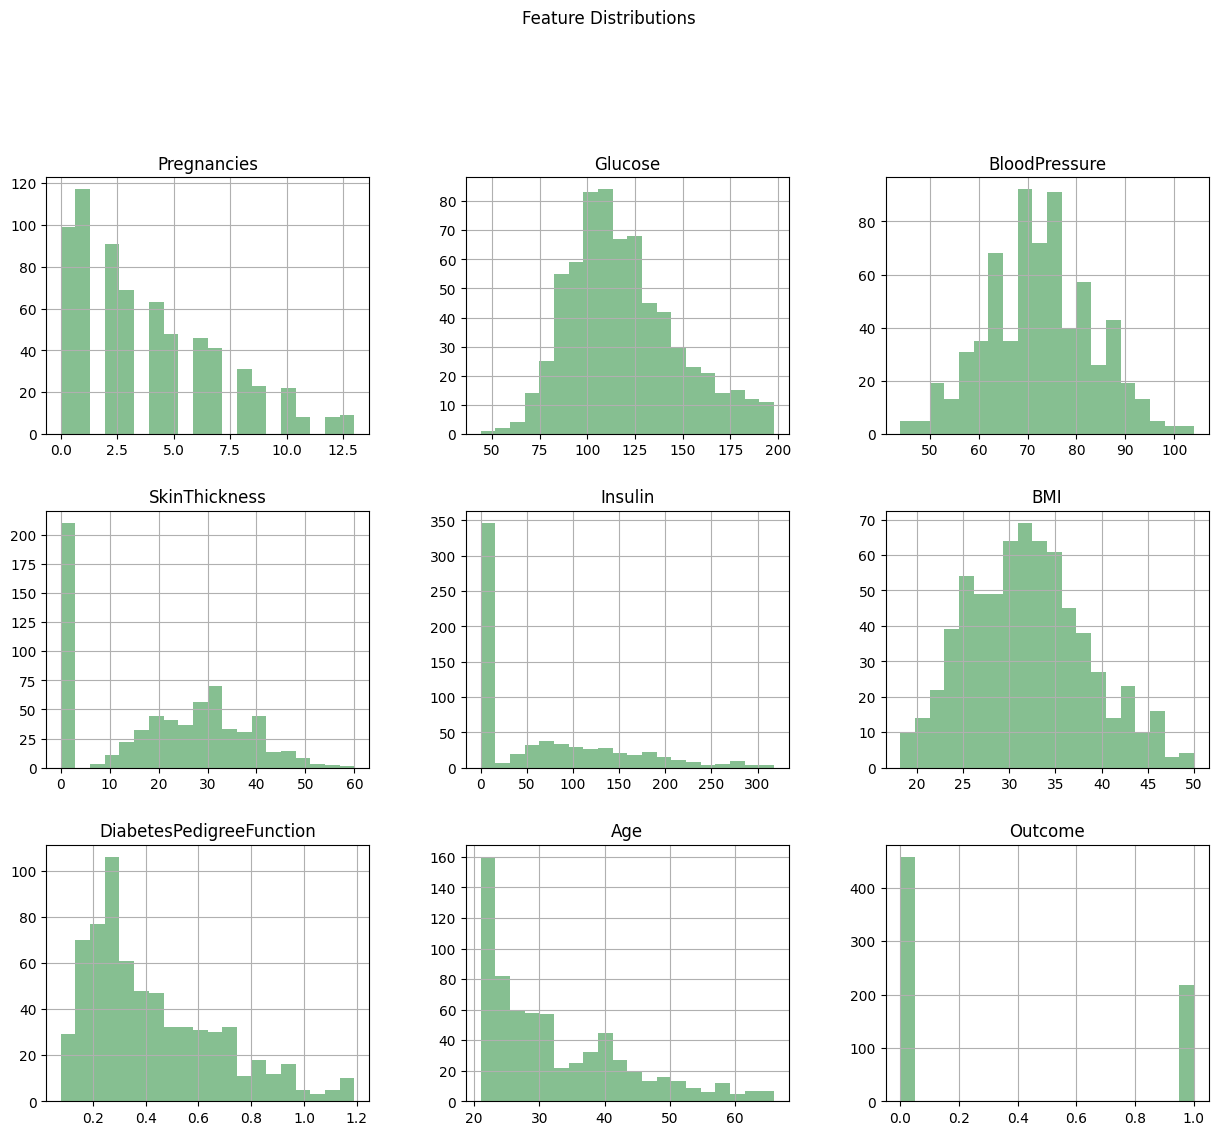

In [18]:
# Histogram distributions
data.hist(figsize=(15,12), bins=20, color='#86bf91')
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

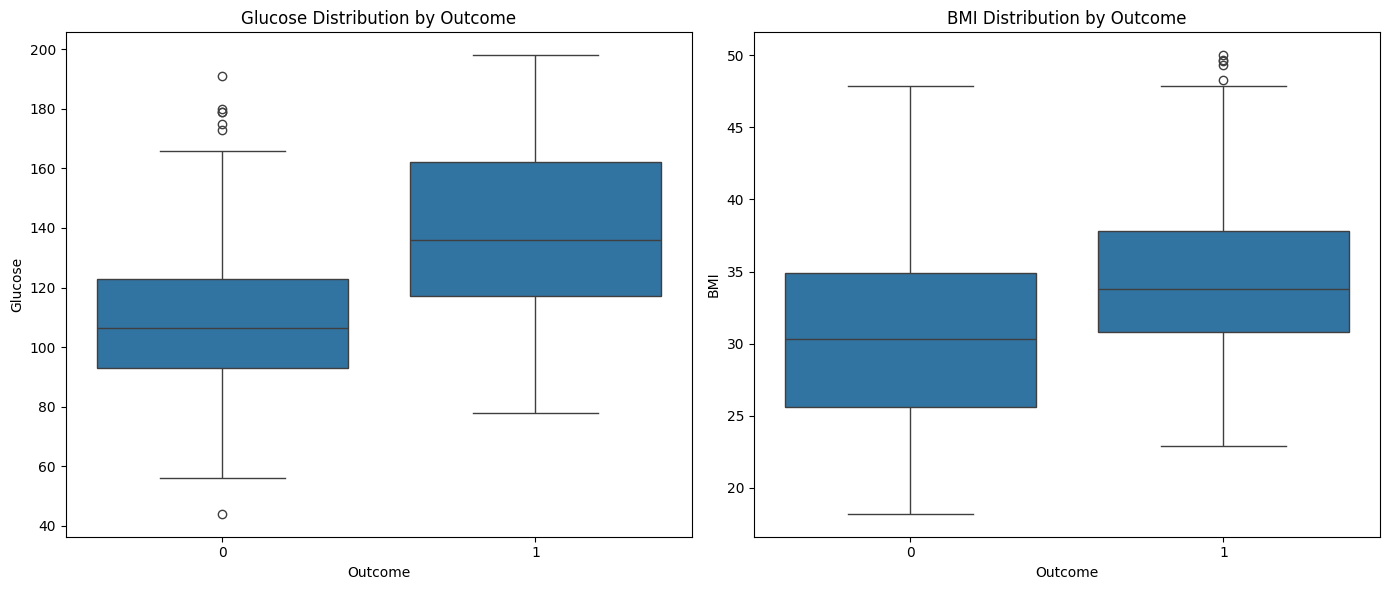

In [19]:
# Boxplot comparisons
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(x='Outcome', y='Glucose', data=data, ax=ax[0])
sns.boxplot(x='Outcome', y='BMI', data=data, ax=ax[1])
ax[0].set_title("Glucose Distribution by Outcome")
ax[1].set_title("BMI Distribution by Outcome")
plt.tight_layout()
plt.show()

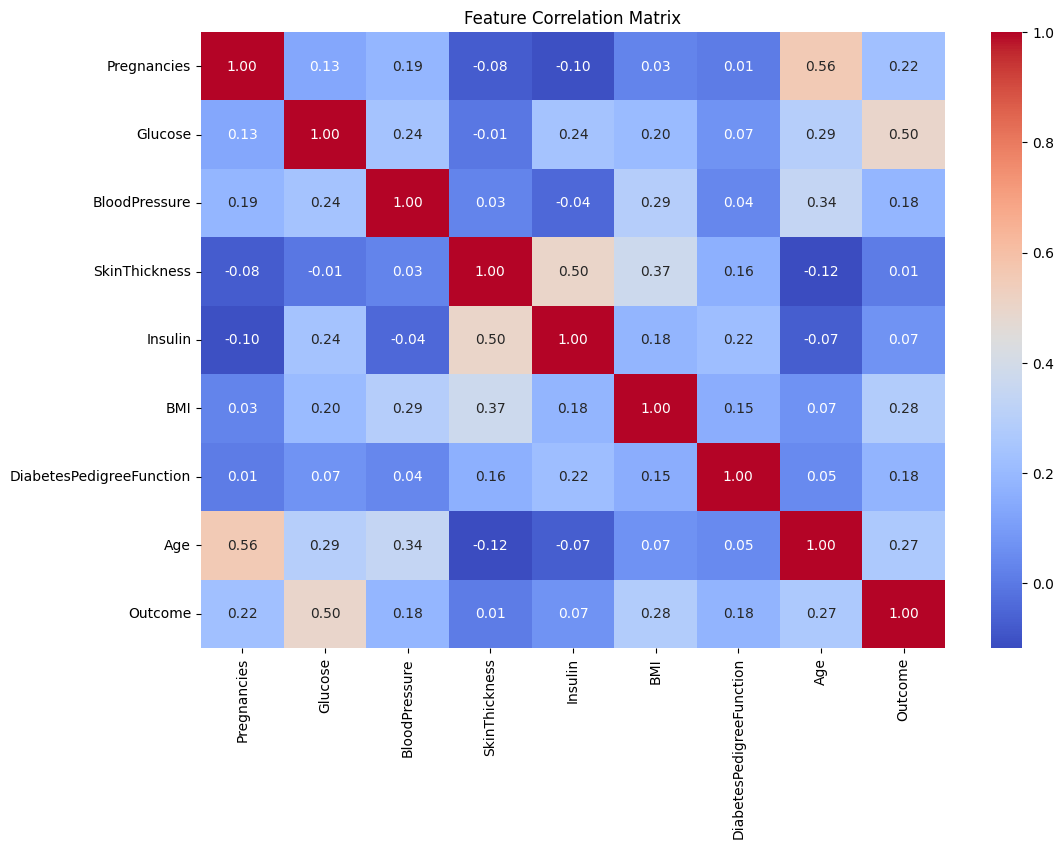

In [20]:
# Heatmap for correlation analysis
plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [21]:
# =====================
# 6. PREDICTIVE MODELING
# =====================

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_curve,
                             auc)

In [29]:
# Prepare data
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [30]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       138
           1       0.70      0.51      0.59        65

    accuracy                           0.77       203
   macro avg       0.75      0.70      0.72       203
weighted avg       0.77      0.77      0.76       203


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       138
           1       0.56      0.42      0.48        65

    accuracy                           0.71       203
   macro avg       0.66      0.63      0.64       203
weighted avg       0.69      0.71      0.70       203


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       138
           1       0.59      0.51      0.55        65

    accuracy                           0.73       203
   macro avg       0.69      0.67     

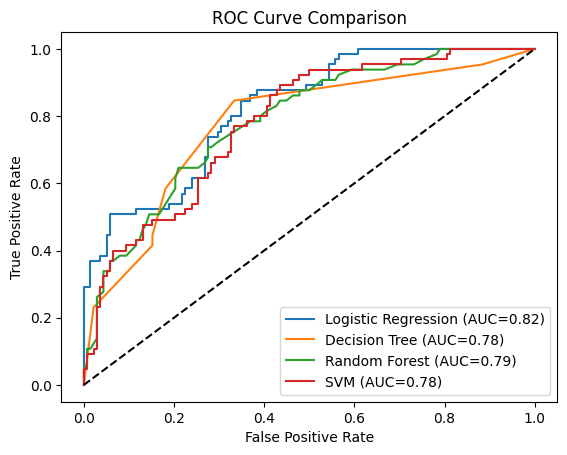

In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True)
}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]

    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc(fpr,tpr):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [ ]:
# =====================
# 7. MODEL INTERPRETATION
# =====================

In [34]:
# Feature importance analysis
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

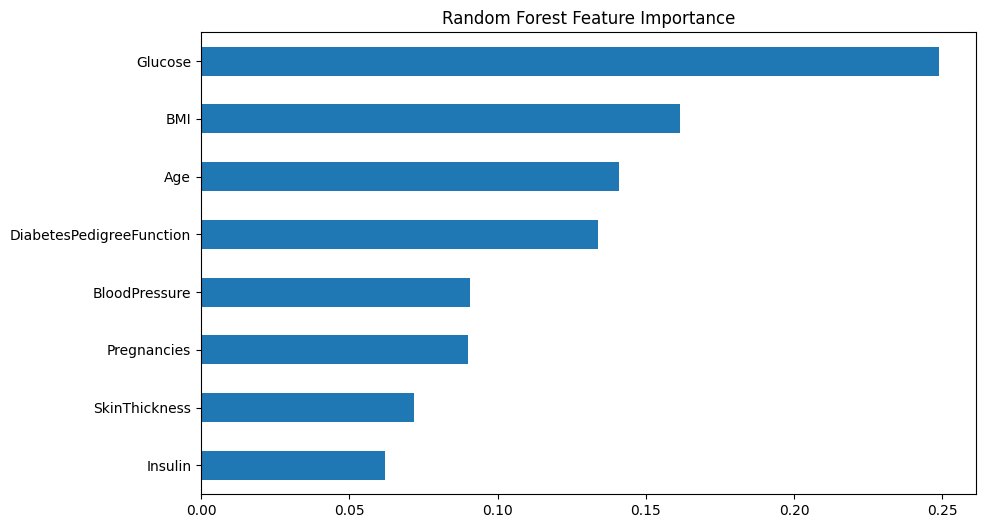

In [35]:
plt.figure(figsize=(10,6))
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

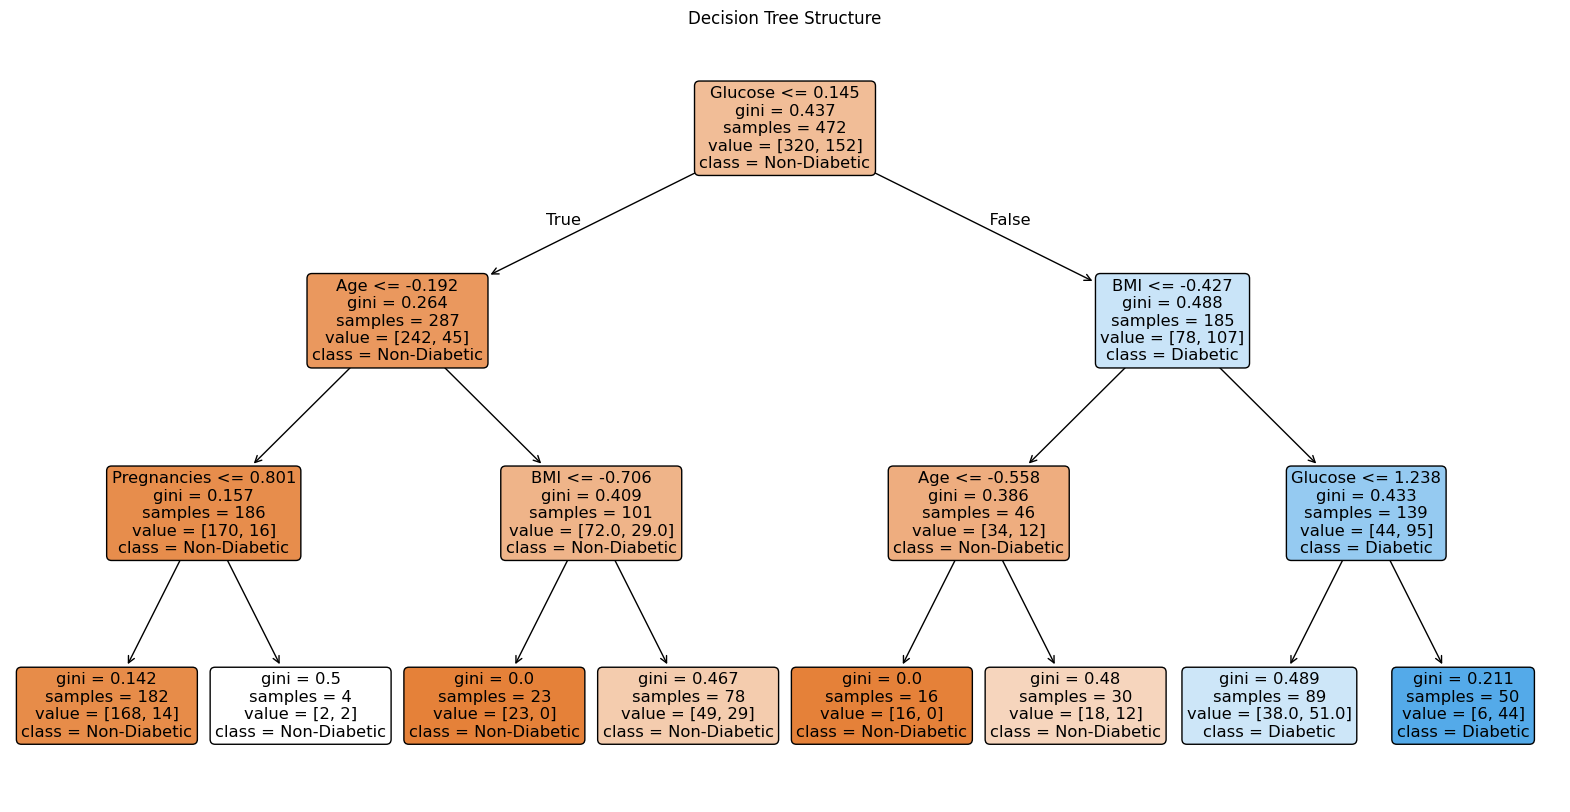

In [36]:
# Decision tree visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(models["Decision Tree"], feature_names=X.columns,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()